## Conditional Agent

In [6]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [2]:
class AgentState(TypedDict):
    number : int
    operation : str
    number2 : int
    finalNumber: int

def adder(state: AgentState) -> AgentState:
    """This node perform addition"""
    state['finalNumber'] = state['number'] + state['number2']
    return state
def subtractor(state: AgentState) -> AgentState:
    """This node perform subtraction"""
    state['finalNumber'] = state['number'] - state['number2']
    return state
def multiplier(state: AgentState) -> AgentState:
    """This node perform multiplication"""
    state['finalNumber'] = state['number'] * state['number2']
    return state
def divider(state: AgentState) -> AgentState:
    """This node perform division"""
    state['finalNumber'] = state['number'] / state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node decides which operation to perform based on the operation field"""
    if state['operation'] == '+':
        return 'addition_edge'
    elif state['operation'] == '-':
        return 'subtraction_edge'
    elif state['operation'] == '*':
        return 'multiplication_edge'
    elif state['operation'] == '/':
        return 'division_edge'
    else:
        raise ValueError("Invalid operation")


In [3]:
graph = StateGraph(AgentState)

graph.add_node("add",adder)
graph.add_node("sub",subtractor)
graph.add_node("mul",multiplier)
graph.add_node("div",divider)
graph.add_node("router",lambda state:state) # pass through function

graph.add_edge(START,"router")
graph.add_conditional_edges(source="router",
                            path=decide_next_node,
                            path_map={
                                # edge : node
                                "addition_edge":"add",
                                "subtraction_edge":"sub",
                                "multiplication_edge":"mul",
                                "division_edge":"div"
                            })
graph.add_edge("add",END)
graph.add_edge("sub",END)
graph.add_edge("mul",END)
graph.add_edge("div",END)

app = graph.compile()



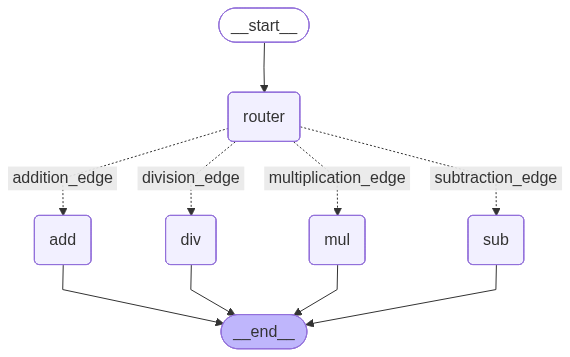

In [5]:
# for visualization 
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({'number': 10, 'operation': '+', 'number2': 5})
result

{'number': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}

In [8]:
result = app.invoke({'number': 10, 'operation': '-', 'number2': 5})
result

{'number': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}

In [9]:
result = app.invoke({'number': 10, 'operation': '*', 'number2': 5})
result

{'number': 10, 'operation': '*', 'number2': 5, 'finalNumber': 50}

In [10]:
result = app.invoke({'number': 10, 'operation': '/', 'number2': 5})
result

{'number': 10, 'operation': '/', 'number2': 5, 'finalNumber': 2.0}